# Instructions

Workflow

Create a Jupyter notebook.

Get the data to be used (from MovieTweetings latest). We will only use one of the three files: ratings.dat.

Answer the following questions.

a. How many users and movies are mentioned in the dataset?
b. How old are the data points (number of data points per year)
c. How popular are popular movies? Looking at the data, when will you say a movie is popular?
d. How many long-tail movies are there?
e. How many movies has each user rated?
f. If you had a recommender system that only recommends the most popular movies, how good would it be?

Write a report answering the questions above, with charts illustrating your answers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib


In [2]:
# user_id::movie_id::rating::rating_timestamp
df = pd.read_csv(r'../data/ratings.dat', sep='::',
                 names=['user_id', 'movie_id', 'rating', 'rating_timestamp'])
df.shape

<ipython-input-2-10a54a9cd789>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(r'../data/ratings.dat', sep='::',


(888452, 4)

In [3]:
df.head()

,user_id,movie_id,rating,rating_timestamp
0,1,114508,8,1381006850
1,2,75314,1,1595468524
2,2,102926,9,1590148016
3,2,114369,10,1597555347
4,2,118715,8,1596006798


# of Users: 69324; # of Movies: 36380


<AxesSubplot:xlabel='value', ylabel='unique'>

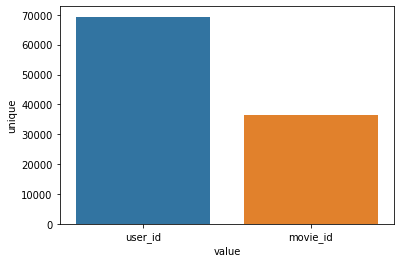

In [4]:
# a. how many users/movies
n_users = df.user_id.nunique()
n_movies = df.movie_id.nunique()
print(f'# of Users: {n_users}; # of Movies: {n_movies}')
cnts = df[['user_id', 'movie_id']].nunique().reset_index()
cnts.columns = ['value', 'unique']
sns.barplot(x='value', y='unique', data=cnts)

b. how old are the data points (# per year)


In [5]:
df['rating_timestamp'] = pd.to_datetime(df['rating_timestamp'], unit='s')
df['year'] = df['rating_timestamp'].dt.year
df['year'].nunique(), df['year'].min(), df['year'].max()

(8, 2013, 2020)

Ratings by Year


<AxesSubplot:xlabel='year'>

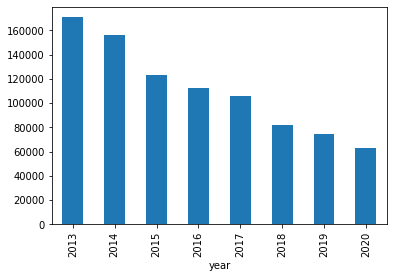

In [6]:
print('Ratings by Year')
df.groupby('year')['rating'].count().plot(kind='bar')

c. How popular are popular movies? Looking at the data, when will you say a movie is popular?

It depends on what we mean by 'popular', but it doesn't take many reviews to join a select group.
I'm going to define 'popular' as 'having a lot of reviews', since a bad movie could still be popular and have a lot of reviews.
E.g., to be in the top 20% of movies by popularity, one only needs 11 or more ratings.

In [7]:
# count number of users who rated each movie, then group movies by number of ratings
n_rating_df = df.groupby('movie_id').count()['user_id'].reset_index()
n_rating_df.columns = ['movie_id', 'n_ratings']
gdf = n_rating_df.groupby('n_ratings').count().reset_index()
gdf.columns = ['n_ratings', 'n_movies_with_n_ratings']

<AxesSubplot:xlabel='n_ratings', ylabel='n_movies_with_n_ratings'>

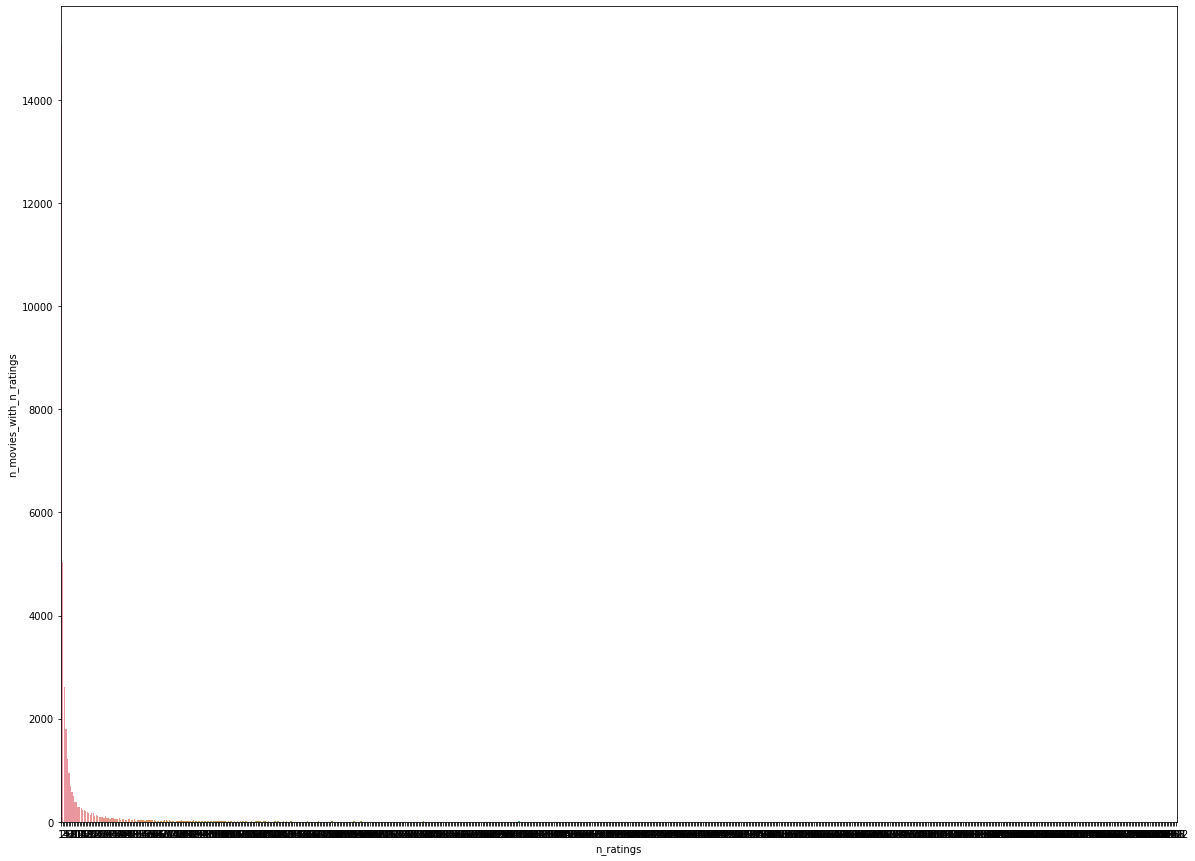

In [8]:
plt.figure(figsize=(20,15))
sns.barplot(x='n_ratings', y='n_movies_with_n_ratings', data=gdf)

In [10]:
n_rating_df = n_rating_df.sort_values(by='n_ratings', ascending=False)
n_rating_df['csum_ratings'] = n_rating_df.n_ratings.cumsum()
n_rating_df['percent_ratings'] = n_rating_df.csum_ratings / n_rating_df.n_ratings.sum()
n_rating_df

,movie_id,n_ratings,csum_ratings,percent_ratings
18882,1454468,3102,3102,0.003491
15767,816692,2931,6033,0.006790
35184,8579674,2858,8891,0.010007
16480,993846,2826,11717,0.013188
34147,7286456,2742,14459,0.016274
...,...,...,...,...
8221,106373,1,888448,0.999995
8224,106384,1,888449,0.999997
8532,109575,1,888450,0.999998
8230,106438,1,888451,0.999999


/Users/dcron/wksp/manning-movie-recs/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dcron/wksp/manning-movie-recs/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_ratings', ylabel='Density'>

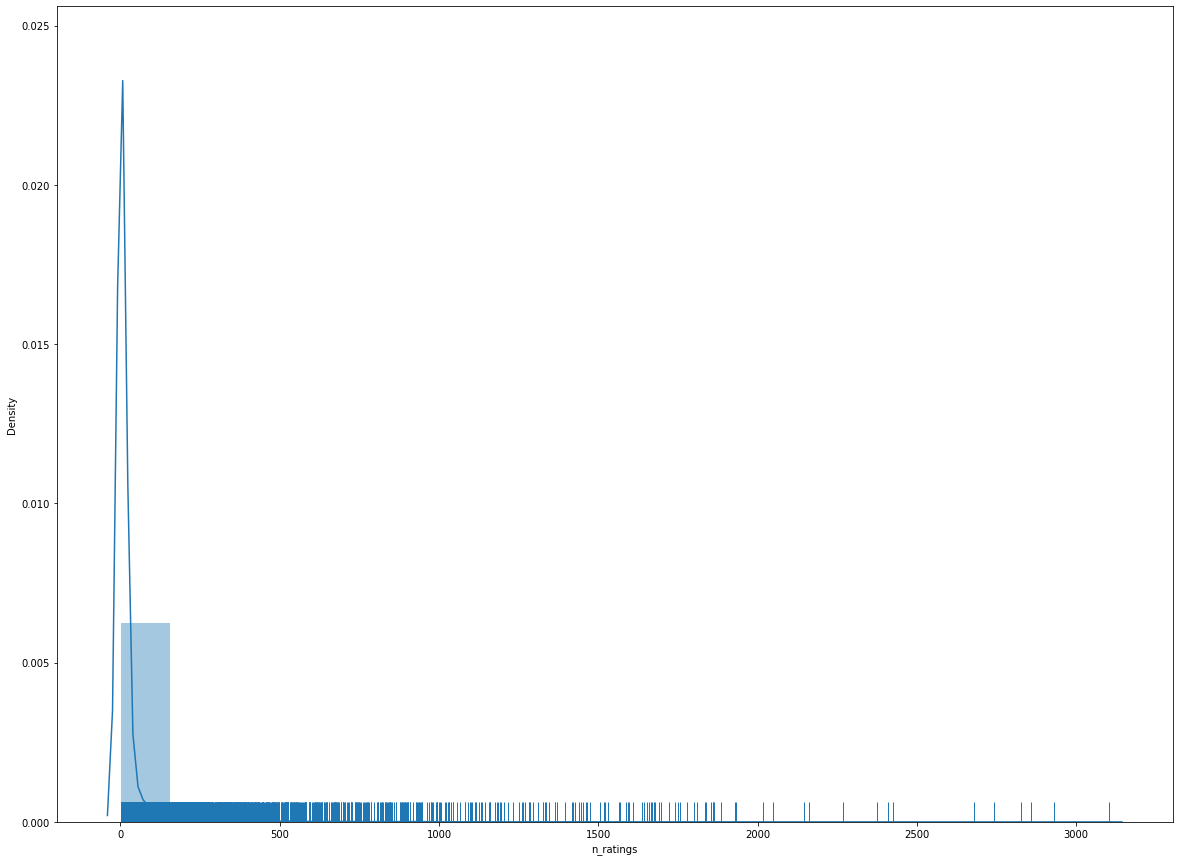

In [11]:
plt.figure(figsize=(20,15))
sns.distplot(n_rating_df.n_ratings, bins=20, kde=True, rug=True)

/Users/dcron/wksp/manning-movie-recs/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dcron/wksp/manning-movie-recs/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_ratings', ylabel='Density'>

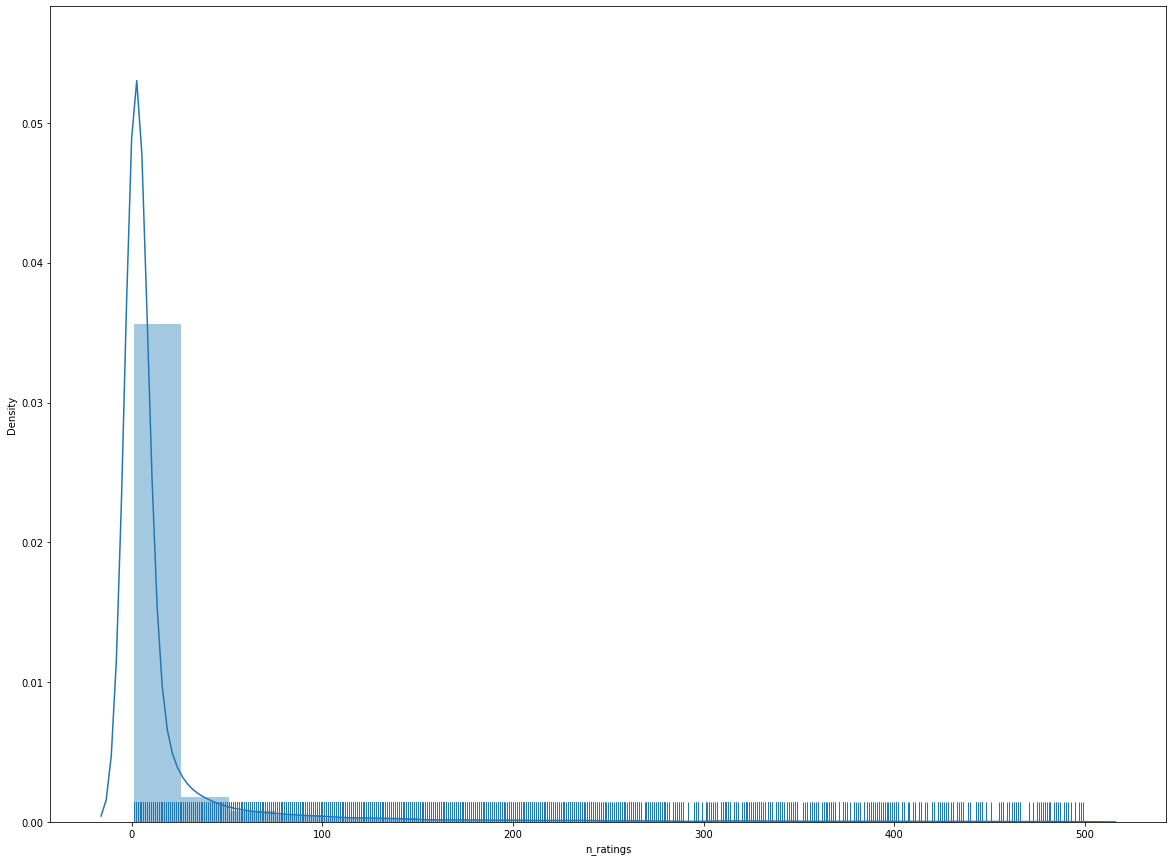

In [12]:
plt.figure(figsize=(20,15))
sns.distplot(n_rating_df[n_rating_df.n_ratings < 500].n_ratings, bins=20, kde=True, rug=True)

/Users/dcron/wksp/manning-movie-recs/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dcron/wksp/manning-movie-recs/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_ratings', ylabel='Density'>

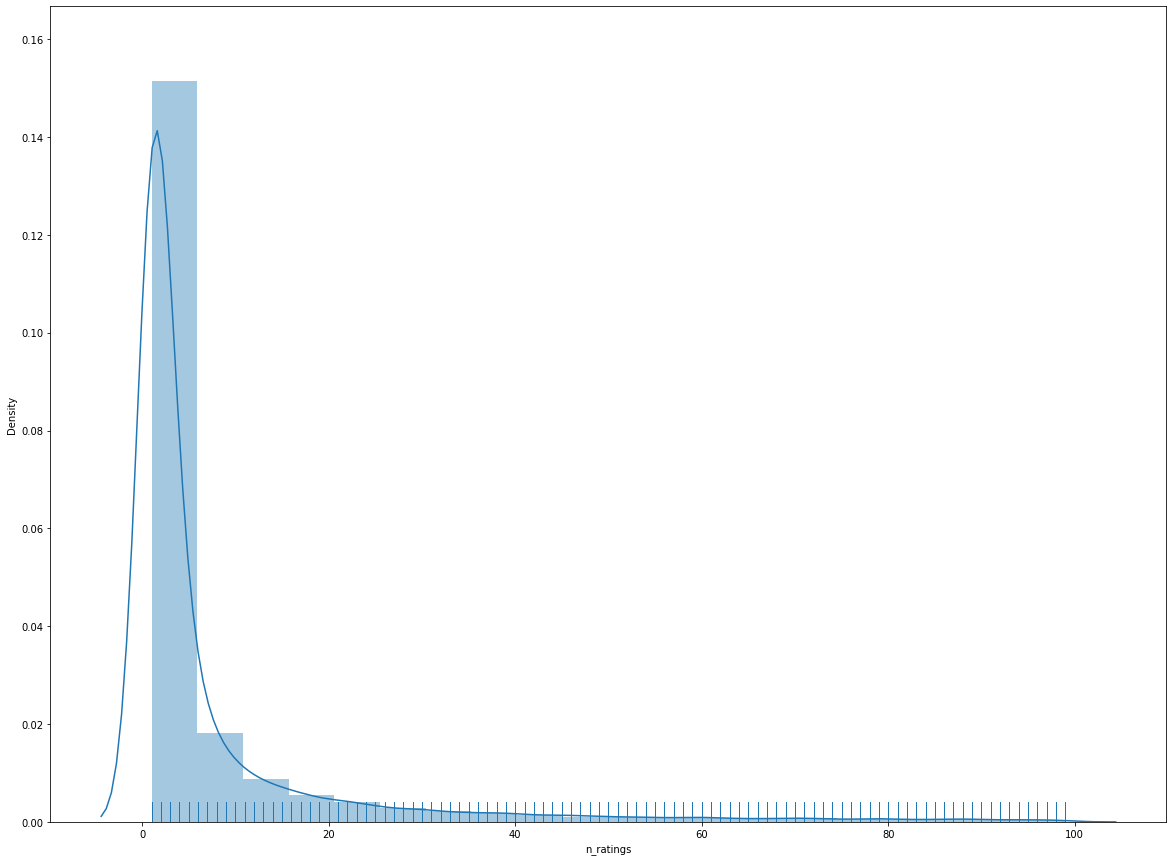

In [13]:
plt.figure(figsize=(20,15))
sns.distplot(n_rating_df[n_rating_df.n_ratings < 100].n_ratings, bins=20, kde=True, rug=True)

In [14]:
# percent of ratings above a threshold
n_rating_df[n_rating_df.n_ratings > 10].shape[0] / n_rating_df.shape[0]


0.20728422210005498

d. How many long-tail movies are there?

Use paretto 80%

In terms of popularity, the above shows, 80% of movies have 10 or fewer ratings.

In [15]:
f'Number of movies with 10 or fewer ratings {n_rating_df[n_rating_df.n_ratings <= 10].shape[0]} (of {n_rating_df.shape[0]} total)'

'Number of movies with 10 or fewer ratings 28839 (of 36380 total)'

e. How many movies has each user rated?

Most users have only rated a few. (50% have rated 2 or fewer movies)

/Users/dcron/wksp/manning-movie-recs/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dcron/wksp/manning-movie-recs/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_movies', ylabel='Density'>

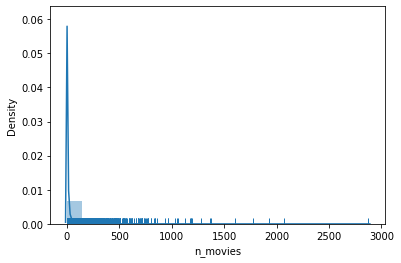

In [16]:
user_ratings = df.groupby('user_id')['movie_id'].count().reset_index()
user_ratings.columns = ['user_id', 'n_movies']
sns.distplot(user_ratings.n_movies, bins=20, kde=True, rug=True)


/Users/dcron/wksp/manning-movie-recs/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dcron/wksp/manning-movie-recs/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_movies', ylabel='Density'>

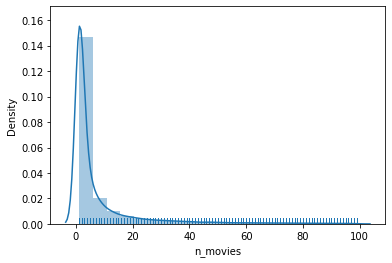

In [17]:
sns.distplot(user_ratings[user_ratings.n_movies < 100].n_movies, bins=20, kde=True, rug=True)

In [18]:
user_ratings.n_movies.describe()

count    69324.000000
mean        12.815937
std         45.800590
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max       2875.000000
Name: n_movies, dtype: float64

f. If you had a recommender system that only recommends the most popular movies, how good would it be?

This can be answered by looking at the ratings of the most popular movies.
It's unclear what exactly the ratings mean, and what the cutoff should be for a good recommendation.
I'll use the cutoff of 7, assuming that ideally all recommendations should have ratings of 7+.

Using this cutoff, nearly 75% of people would be satisfied by an arbitrary 'popular' movie.

<AxesSubplot:xlabel='rating', ylabel='count'>

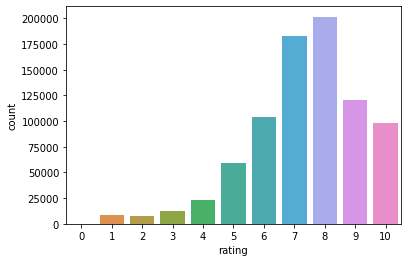

In [19]:
# most popular movies (top 20%)
pop_movies = set(n_rating_df[n_rating_df.n_ratings > 10].movie_id)
# get ratings
pop_ratings = df[df.movie_id.isin(pop_movies)].rating
sns.countplot(x='rating', data=df[df.movie_id.isin(pop_movies)])

In [20]:
pop_ratings[pop_ratings >= 7].shape[0] / pop_ratings.shape[0]


0.7369953740971428